# Implémenter le support vector machine from scratch

## Importation des packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Importation des données

In [ ]:
data = load_iris()

In [ ]:
data = pd.DataFrame(np.concatenate([data.data, data.target.reshape(-1, 1)], axis=1),
                    columns = data.feature_names + ['target'])

In [ ]:
data = data[data.loc[:, "target"]<2]

# Visualisation

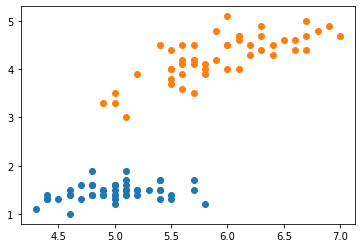

In [ ]:
plt.scatter(data[data['target']==0].iloc[:, 0], data[data['target']==0].iloc[:, 2])
plt.scatter(data[data['target']==1].iloc[:, 0], data[data['target']==1].iloc[:, 2])
plt.show()

## Séparation des données explicatives et de la variable cible

In [ ]:
x = data.iloc[:, [0, 2]]
y = np.array(data.loc[:, 'target']).reshape(-1, 1)

## Standardisation des données

In [ ]:
scaler = StandardScaler()

scaler.fit(x)

x_norm =  scaler.transform(x)

## Implémentation du support vector machine from scratch

# Initialisation

In [ ]:
class support_vector_machine():
  def __init__(self, x, c, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)
    self._c = c

In [ ]:
svm = support_vector_machine(x=x_norm, c=1)
print(svm._w)
print(svm._c)

[[0.69646919]
 [0.28613933]
 [0.22685145]]
1


# Prédiction

$$pred(X) = sign(X.W) = \hat y$$

In [ ]:
class support_vector_machine():
  def __init__(self, x, c, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)
    self._c = c

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)>0

In [ ]:
svm = support_vector_machine(x=x_norm, c=1)
svm.predict(x_norm)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

# La fonction de coût

$$ J(w) = \frac 1 2 ||w||^2 + \frac c m \sum \max(1-y_i (w_0+x_i .w),0) $$

In [ ]:
class support_vector_machine():
  def __init__(self, x, c, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)
    self._c = c

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)>0

  def compute_cost(self, y, y_hat):
    m, _ = y.shape

    y_1 = np.copy(y)
    y_1[y_1==0] = -1

    return 1/2 * np.power(np.linalg.norm(self._w), 2) + np.sum(np.where((1 - np.multiply(y_1, y_hat)) > 0, 1, 0) * (self._c * (1 - y_1 * y_hat))/ m)

In [ ]:
svm = support_vector_machine(x=x_norm, c=1)
y_pred = svm.predict(x_norm)
svm.compute_cost(y, y_pred)

1.269203313738693

# L'entraînement

$$
\frac{\partial }{\partial w}J(w) = \left\{
    \begin{array}{ll}
        w, & \mbox{si $ 1-y_i+(w_0+x_i.w) \le 0$} \\
        w - \sum \frac c m y_i . x_i, & \mbox{sinon.}
    \end{array}
\right.
$$


In [ ]:
class support_vector_machine():
  def __init__(self, x, c, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)
    self._c = c

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)>0

  def compute_cost(self, y, y_hat):
    m, _ = y.shape

    y_1 = np.copy(y)
    y_1[y_1==0] = -1

    return 1/2 * np.power(np.linalg.norm(self._w), 2) + np.sum(np.where((1 - np.multiply(y_1, y_hat)) > 0, 1, 0) * (self._c * (1 - y_1 * y_hat))/ m)

  def fit(self, x, y, learning_rate=0.001, num_iters=200):
    m, n = x.shape

    y_1 = np.copy(y)
    y_1[y_1==0] = -1

    x_1 = np.hstack((np.ones((m, 1)), x))

    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):

      self._w = self._w - learning_rate * (self._w - np.sum(np.where((1 - np.multiply(y_1, np.dot(x_1, self._w))) > 0, 1, 0) * (self._c/m)*y_1*x_1,axis=0).reshape(-1, 1))

      J_history[i] = self.compute_cost(y_1, np.dot(x_1, self._w))

    return J_history


In [ ]:
svm = support_vector_machine(x_norm, 50)
history = svm.fit(x_norm, y, learning_rate=0.001, num_iters=500)

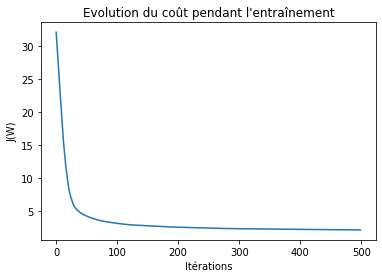

In [ ]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

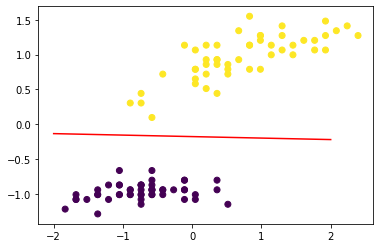

In [ ]:
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=y)

svm_x = np.arange(-2, 3)

svm_y = (- svm._w[0] - svm_x * svm._w[1]) / svm._w[2]

plt.plot(svm_x, svm_y, color='red')

plt.show()